In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats
import os

%matplotlib inline
warnings.filterwarnings('ignore')

In [170]:
stock = pd.read_csv('./dataset/cryptocurrencies/HEX-USD.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-22,0.004035,0.004105,0.003688,0.003790,0.003790,1486491.0
1,2020-09-23,0.003789,0.003798,0.003345,0.003443,0.003443,1522601.0
2,2020-09-24,0.003443,0.003630,0.003429,0.003618,0.003618,1316401.0
3,2020-09-25,0.003622,0.003774,0.003568,0.003753,0.003753,1174258.0
4,2020-09-26,0.003754,0.004019,0.003542,0.004019,0.004019,1181630.0


Checking null values

In [171]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       357 non-null    object 
 1   Open       196 non-null    float64
 2   High       196 non-null    float64
 3   Low        196 non-null    float64
 4   Close      196 non-null    float64
 5   Adj Close  196 non-null    float64
 6   Volume     196 non-null    float64
dtypes: float64(6), object(1)
memory usage: 19.6+ KB


In [172]:
stock.dropna(axis=0, inplace=True)
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       196 non-null    object 
 1   Open       196 non-null    float64
 2   High       196 non-null    float64
 3   Low        196 non-null    float64
 4   Close      196 non-null    float64
 5   Adj Close  196 non-null    float64
 6   Volume     196 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.2+ KB


Non-Parametric Estimation
===================================
Plot PDF in histogram and using KDE for each variables

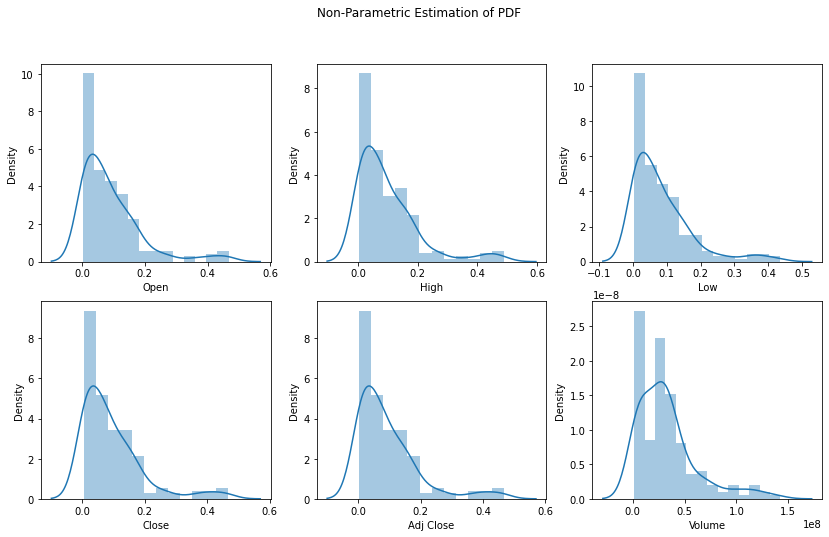

In [173]:
# initiate figure
fig, ax = plt.subplots(2, 3, figsize=(14,8))
fig.suptitle('Non-Parametric Estimation of PDF')

# columns to plot
columns = list(stock.columns[1:])

for ax, cols in zip(ax.flat, columns):
    sns.distplot(stock[cols], ax=ax, kde=True)

Multivariate Mathematical Expectation & Variance
================================================
Take mean and variance from all continuous variables

In [174]:
stock[columns].mean()

Open         9.091348e-02
High         9.758681e-02
Low          8.410839e-02
Close        9.276402e-02
Adj Close    9.276402e-02
Volume       3.240606e+07
dtype: float64

In [175]:
stock[columns].cov()

,Open,High,Low,Close,Adj Close,Volume
Open,9.386864e-03,9.920453e-03,8.556312e-03,9.520111e-03,9.520111e-03,2.338488e+06
High,9.920453e-03,1.056896e-02,9.073779e-03,1.014133e-02,1.014133e-02,2.564588e+06
Low,8.556312e-03,9.073779e-03,7.858989e-03,8.729385e-03,8.729385e-03,2.131807e+06
Close,9.520111e-03,1.014133e-02,8.729385e-03,9.762214e-03,9.762214e-03,2.440027e+06
Adj Close,9.520111e-03,1.014133e-02,8.729385e-03,9.762214e-03,9.762214e-03,2.440027e+06
Volume,2.338488e+06,2.564588e+06,2.131807e+06,2.440027e+06,2.440027e+06,8.317861e+14


Conditional Distribution Non-Parametric Estimation, Mathematical Expectation, & Variance
===


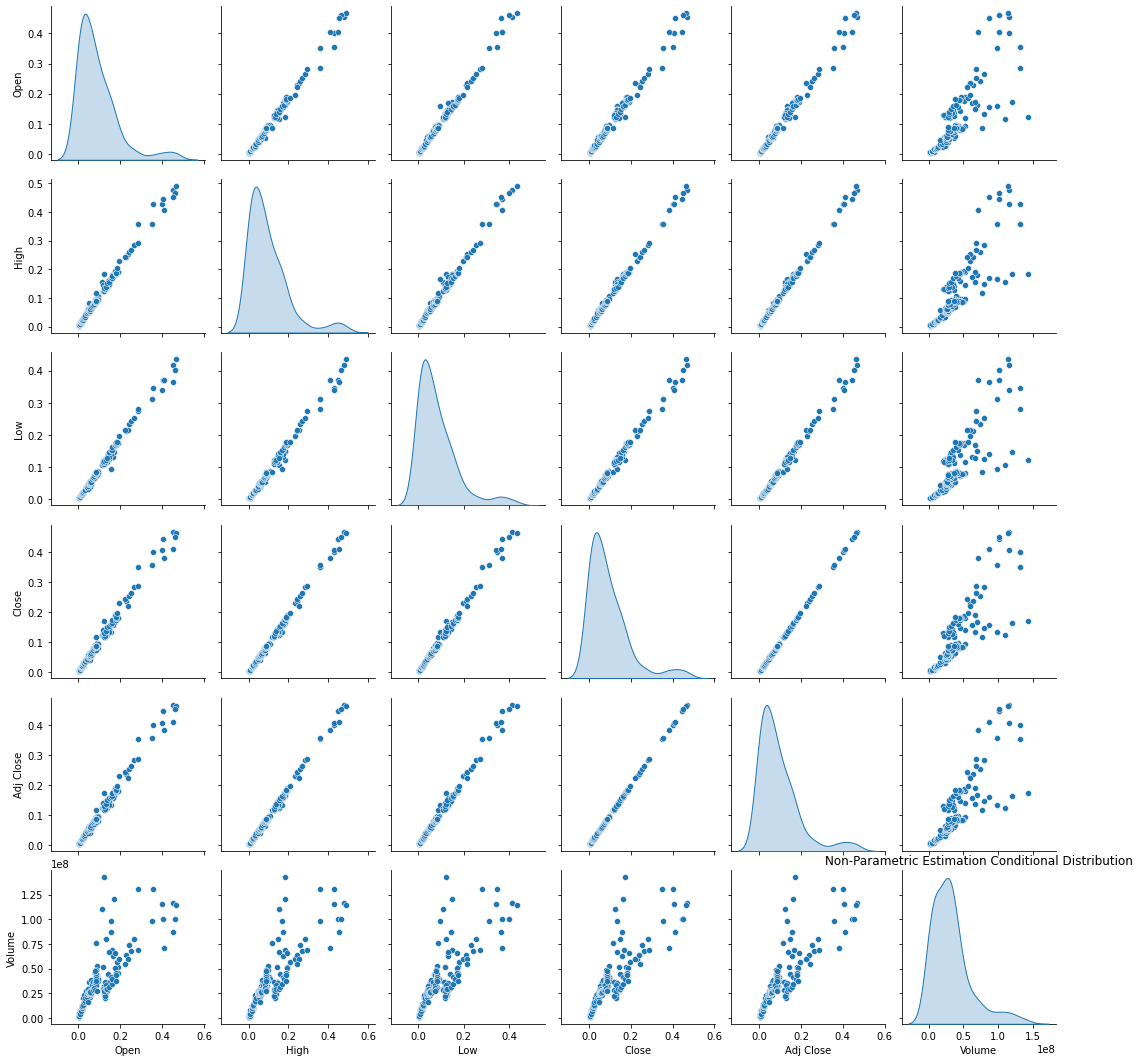

In [176]:
sns.pairplot(stock[columns], diag_kind='kde')
plt.title('Non-Parametric Estimation Conditional Distribution')
plt.show()

Generate discrete variable

In [177]:
# convert Date column into datetime
stock.Date = pd.to_datetime(stock.Date)
stock.sort_values(by=['Date'], inplace=True)

# extract month & year from Date column
stock['Month'] = stock.Date.dt.month
stock['Year'] = stock.Date.dt.year

stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2020-09-22,0.004035,0.004105,0.003688,0.003790,0.003790,1486491.0,9,2020
1,2020-09-23,0.003789,0.003798,0.003345,0.003443,0.003443,1522601.0,9,2020
2,2020-09-24,0.003443,0.003630,0.003429,0.003618,0.003618,1316401.0,9,2020
3,2020-09-25,0.003622,0.003774,0.003568,0.003753,0.003753,1174258.0,9,2020
4,2020-09-26,0.003754,0.004019,0.003542,0.004019,0.004019,1181630.0,9,2020


In [178]:
conditional = stock.Year == 2021
stock[conditional].mean(), stock[conditional].var()

(Open         1.065125e-01
 High         1.143271e-01
 Low          9.851484e-02
 Close        1.086726e-01
 Adj Close    1.086726e-01
 Volume       3.784840e+07
 Month        6.246988e+00
 Year         2.021000e+03
 dtype: float64,
 Open         9.493894e-03
 High         1.064817e-02
 Low          7.923471e-03
 Close        9.873308e-03
 Adj Close    9.873308e-03
 Volume       7.879492e+14
 Month        2.502264e+00
 Year         0.000000e+00
 dtype: float64)

Mathematical Expectation of Conditional Distribution

In [179]:
pd.pivot_table(stock[stock.Year == 2021], values=columns, index=['Month', 'Year'], aggfunc=np.mean)

,,Adj Close,Close,High,Low,Open,Volume
Month,Year,,,,,,
4,2021,0.018023,0.018023,0.019130,0.016609,0.018031,9.790352e+06
5,2021,0.044762,0.044762,0.049300,0.039202,0.043640,2.345029e+07
6,2021,0.075615,0.075615,0.079327,0.068909,0.074552,3.411976e+07
7,2021,0.117988,0.117988,0.126320,0.106203,0.116751,5.317630e+07
8,2021,0.168495,0.168495,0.175366,0.157147,0.164246,4.218318e+07
9,2021,0.381686,0.381686,0.395691,0.339141,0.372294,9.864835e+07


Variance of Conditional Distribution

In [180]:
pd.pivot_table(stock[stock.Year == 2021], values=columns, index=['Month', 'Year'], aggfunc=np.var)

,,Adj Close,Close,High,Low,Open,Volume
Month,Year,,,,,,
4,2021,0.000003,0.000003,0.000004,0.000004,0.000003,2.545319e+12
5,2021,0.000171,0.000171,0.000243,0.000138,0.000192,4.203772e+13
6,2021,0.000176,0.000176,0.000221,0.000134,0.000190,5.730856e+13
7,2021,0.000927,0.000927,0.001255,0.000649,0.000964,9.543966e+14
8,2021,0.001468,0.001468,0.001527,0.001174,0.001280,1.984711e+14
9,2021,0.004865,0.004865,0.005908,0.003901,0.006238,5.037914e+14


Pair Correlation Coefficient
===

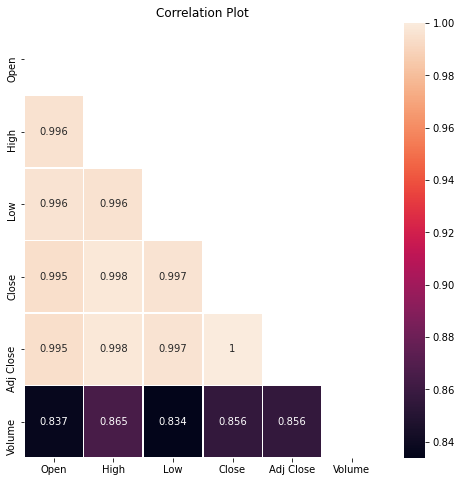

In [181]:
fig, ax = plt.subplots(figsize=(8,8))

corr = stock[columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, ax=ax, vmax=1, fmt='.3g', linewidths=.5)

plt.title('Correlation Plot')
plt.show()

In [185]:
from scipy import stats

for i, col in enumerate(columns):
    j = i+1

    # stop looping if j reach end of index
    if j >= len(columns):
        break

    for k in range(j, len(columns)):

        col2 = columns[k]

        x1, x2 = stock[col], stock[col2]
        coeff, p = stats.pearsonr(x1, x2)
        coeff_z = np.arctanh(coeff)

        std = 1/np.sqrt(x1.size-3)
        alpha = 0.05
        z = stats.norm.ppf(1-alpha/2)
        low_z, high_z = coeff_z-z*std, coeff_z+z*std
        
        print('%s - %s' % (col, col2))
        print('Correlation coeff = ', coeff)
        print('Confidence interval = ', low_z, high_z)
        print('-----')

Open - High
Correlation coeff =  0.9959902553078679
Confidence interval =  2.964002706930333 3.246165296324753
-----
Open - Low
Correlation coeff =  0.9961918938171255
Confidence interval =  2.9898510006721306 3.2720135900665506
-----
Open - Close
Correlation coeff =  0.9945064697942587
Confidence interval =  2.806209126084298 3.088371715478718
-----
Open - Adj Close
Correlation coeff =  0.9945064697942587
Confidence interval =  2.806209126084298 3.088371715478718
-----
Open - Volume
Correlation coeff =  0.8368911794776235
Confidence interval =  1.06962483363657 1.3517874230309903
-----
High - Low
Correlation coeff =  0.9956087621002582
Confidence interval =  2.918465334118425 3.2006279235128448
-----
High - Close
Correlation coeff =  0.9984001670002398
Confidence interval =  3.424020192447738 3.7061827818421578
-----
High - Adj Close
Correlation coeff =  0.9984001670002398
Confidence interval =  3.424020192447738 3.7061827818421578
-----
High - Volume
Correlation coeff =  0.8649591665